# Library

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load Images

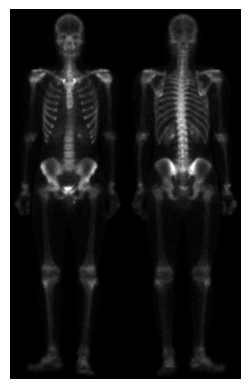

In [2]:
img1 = cv2.imread('skeleton_orig.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(img1, cmap='gray')
plt.axis('off')
plt.show()

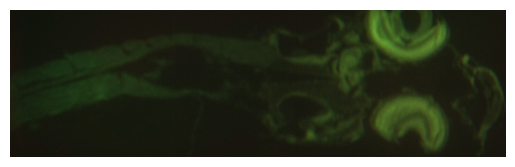

In [3]:
img2 = cv2.imread('fish.jpg')
plt.imshow(img2)
plt.axis('off')
plt.show()

# Useful Functions

In [4]:
def show_image(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

def show_results(img, laplacian_img, sharpened_img1, sobel_gradient_img, smooth_sobel_img, mask_img, sharpened_img2, power_law_trans_img, gray_img=False):
    if gray_img:
        plt.subplot(121)
        plt.imshow(img, cmap='gray')
        plt.title('(A) Original')
        plt.axis('off')
        
        plt.subplot(122)
        plt.imshow(laplacian_img, cmap='gray')
        plt.title('(B) Laplacian')
        plt.axis('off')
        
        plt.show()
        
        plt.subplot(121)
        plt.imshow(sharpened_img1, cmap='gray')
        plt.title('(C) Sharpened (A)+(B)')
        plt.axis('off')
        
        plt.subplot(122)
        plt.imshow(sobel_gradient_img, cmap='gray')
        plt.title('(D) Sobel')
        plt.axis('off')
        
        plt.show()
        
        plt.subplot(121)
        plt.imshow(smooth_sobel_img, cmap='gray')
        plt.title('(E) Blur')
        plt.axis('off')
        
        plt.subplot(122)
        plt.imshow(mask_img, cmap='gray')
        plt.title('(F) Mask')
        plt.axis('off')
        
        plt.show()
        
        plt.subplot(121)
        plt.imshow(sharpened_img2, cmap='gray')
        plt.title('(G) Sharpened (A)+(F)')
        plt.axis('off')
        
        plt.subplot(122)
        plt.imshow(power_law_trans_img, cmap='gray')
        plt.title('(H) Power Transform')
        plt.axis('off')
        
        plt.show()
    
    else:
        plt.subplot(121)
        plt.imshow(img)
        plt.title('(A) Original')
        plt.axis('off')
        
        plt.subplot(122)
        plt.imshow(laplacian_img)
        plt.title('(B) Laplacian')
        plt.axis('off')
        
        plt.show()
        
        plt.subplot(121)
        plt.imshow(sharpened_img1)
        plt.title('(C) Sharpened (A)+(B)')
        plt.axis('off')
        
        plt.subplot(122)
        plt.imshow(sobel_gradient_img)
        plt.title('(D) Sobel')
        plt.axis('off')
        
        plt.show()
        
        plt.subplot(121)
        plt.imshow(smooth_sobel_img)
        plt.title('(E) Blur')
        plt.axis('off')
        
        plt.subplot(122)
        plt.imshow(mask_img)
        plt.title('(F) Mask')
        plt.axis('off')
        
        plt.show()
        
        plt.subplot(121)
        plt.imshow(sharpened_img2)
        plt.title('(G) Sharpened (A)+(F)')
        plt.axis('off')
        
        plt.subplot(122)
        plt.imshow(power_law_trans_img)
        plt.title('(H) Power Transform')
        plt.axis('off')
        
        plt.show()

def normalize_image(image):
    min_val = np.min(image)
    g_m = image - min_val
    
    g_s = 255 * (g_m / np.max(g_m))
    return g_s

## 1. Bone

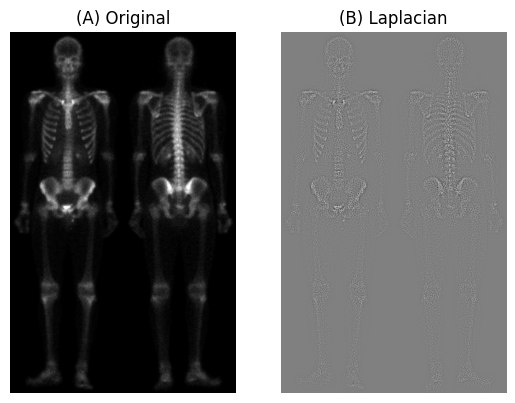

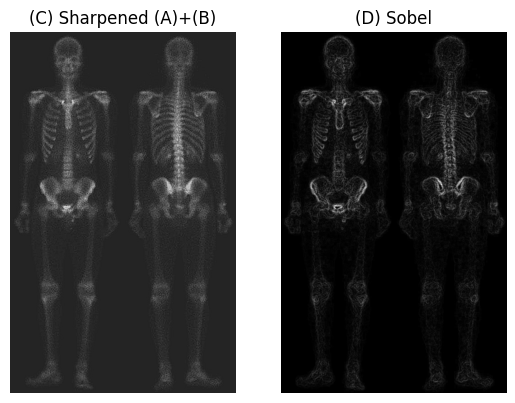

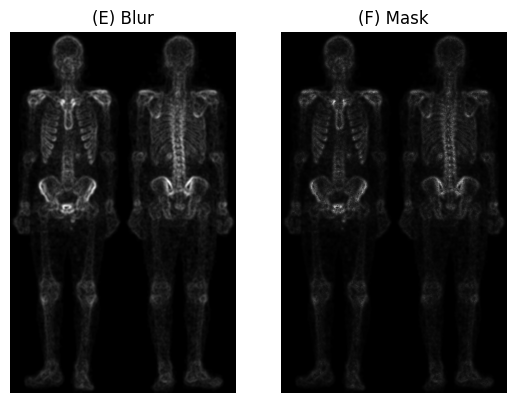

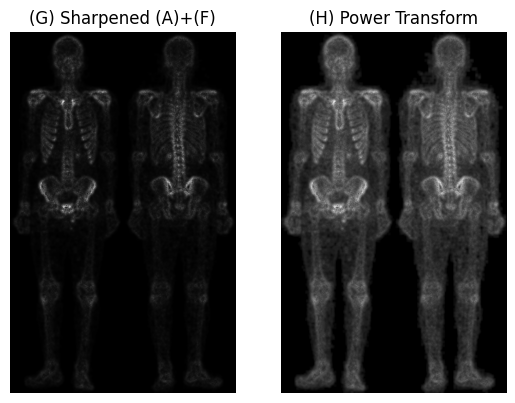

In [5]:
# (b): laplacian
laplacian_kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])
laplacian_img = cv2.filter2D(img1, cv2.CV_64F, laplacian_kernel)

# (c): (a) + (b)
sharpened_by_laplacian_img = img1 + normalize_image(laplacian_img)

# (d): sobel
sobel_kernel_x = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

sobel_kernel_y = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

grad_x = cv2.filter2D(img1, cv2.CV_64F, sobel_kernel_x)
grad_y = cv2.filter2D(img1, cv2.CV_64F, sobel_kernel_y)

sobel_mag = np.absolute(grad_x) + np.absolute(grad_y)

# (e): blur
sobel_smoothed_img = cv2.blur(sobel_mag, (5, 5))

# (f): (b) + (e)
mask_img = normalize_image(laplacian_img) * sobel_smoothed_img

# (g): (a) + (f)
sharpened_by_mask_img = img1 + mask_img

# (h): power transform
gamma, c = 0.5, 1
final_img = c * sharpened_by_mask_img ** gamma

# show the results
show_results(img1, laplacian_img, sharpened_by_laplacian_img, sobel_mag, sobel_smoothed_img, mask_img, sharpened_by_mask_img, final_img, gray_img=True)

## 2. Fish

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-67.0..51.0].


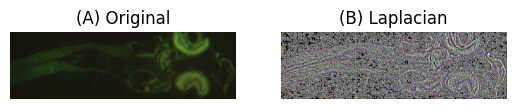

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [44.932203389830505..420.83898305084745].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..138.0].


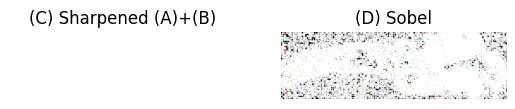

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..100.96000000000001].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..20015.51186440678].


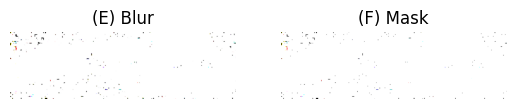

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [11.0..20159.51186440678].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [3.3166247903554..141.98419582617913].


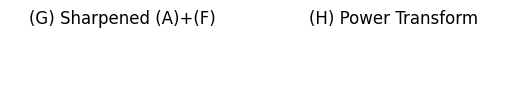

In [6]:
# (b): laplacian
laplacian_kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])
laplacian_img = cv2.filter2D(img2, cv2.CV_64F, laplacian_kernel)

# (c): (a) + (b)
sharpened_by_laplacian_img = img2 + normalize_image(laplacian_img)

# (d): sobel
sobel_kernel_x = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
])

sobel_kernel_y = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

grad_x = cv2.filter2D(img2, cv2.CV_64F, sobel_kernel_x)
grad_y = cv2.filter2D(img2, cv2.CV_64F, sobel_kernel_y)

sobel_mag = np.absolute(grad_x) + np.absolute(grad_y)

# (e): blur
sobel_smoothed_img = cv2.blur(sobel_mag, (5, 5))

# (f): (b) + (e)
mask_img = normalize_image(laplacian_img) * sobel_smoothed_img

# (g): (a) + (f)
sharpened_by_mask_img = img2 + mask_img

# (h): power transform
gamma, c = 0.5, 1
final_img = c * sharpened_by_mask_img ** gamma

# show the results
show_results(img2, laplacian_img, sharpened_by_laplacian_img, sobel_mag, sobel_smoothed_img, mask_img, sharpened_by_mask_img, final_img, gray_img=True)